# Classification Benchmarking

**The goal of this notebook is to benchmark different algorithms on the classification of the toy dataset, before moving to the next stage that is using them for our real data on the autistic project.**


The algorithms that will be tested are:

* The baseline algorithm is the use of `imputations` techniques (let's say MICE, or Matias' technic) both at training and for the inference.

    
* Imputation using Matias' `custom_imputations` method, that resorts on pdf estimation with kernel. The model is a k dimensional distribution, estimating using a gaussian kernel with optimal bandwidth, handling missing coordinates by imputing them based on the proximity with other data from the training set. The inference for a sample is performed on the subset of coordinates that are known, by computing first the marginal of the k-dimensional distribution on the known axis. Note here that no imputation are performed at inference time, but there are during training. 
        
* The `no_imputations` approach will be used, which consist in estimating several distributions, $f_{X|Z}$, and doing inference using them. No imputation are performed, and the marginals are not used (yet). 
    
* The use of `neural_additive_models` developed in [1] will be tested. This method present an interpretable way of using neural network in this setting.
    
* The use of `XGBoost` will be tested. 



Also, direct use of the $Z$ distributions will be used for classification, usinf 

<ins>Inputs:</ins>

* $(X_n)_n \in \mathbb{R}^K$


* $(Z_n)_n \in [ 0, 1]^K $


<ins>Outputs:</ins>

* $(Y_n)_n \in [ 0, 1]$

We would like to show:

* Do a benchmarking of the different methods. 
* If encoding the Nans, is it necessary to add the Z variables ?
* SEE TABLE and come up with experiments. 


    
    
<ins>Takeaways:</ins>

    * Handling missing data is better than discarding them.
    * ...

[1]. Agarwal, R. et al. Neural Additive Models: Interpretable Machine Learning with Neural Nets. Arxiv (2020).

In [1]:
run init.ipynb

Done.


In [2]:
if True:
    # DATASET PARAMETERS
    DATASET_NAME = 'circles'
    NUM_SAMPLES = 100
    IMBALANCE_RATIO = .5

    # Missingness default parameters
    MISSINGNESS_PATTERN = 3
    MAX_TRY_MISSSINGNESS = 10
    RATIO_OF_MISSING_VALUES = .2
    RATIO_MISSING_PER_CLASS = [.1, .3]

    # Handling of issing data in the case of non-robust algorithms, or for experimental purposes.
    MISSING_DATA_HANDLING = 'without'
    DEFAULT_IMPUTATION_METHOD = 'mice'
    DEFAULT_MISSING_VALUE = -5

    # pdf estimation default parameters
    RESOLUTION = 10
    BANDWIDTH = .2

    # Classification default parameters
    PROPORTION_TRAIN = .8

    # Verbosity
    VERBOSITY=4

# Introduction - Dataset definition

In [14]:
# Dataset default parameters
dataset_name = DATASET_NAME
num_samples = NUM_SAMPLES
imbalance_ratio = IMBALANCE_RATIO

# Missingness default parameters
missingness_pattern = MISSINGNESS_PATTERN
ratio_of_missing_values = RATIO_OF_MISSING_VALUES
ratio_missing_per_class = RATIO_MISSING_PER_CLASS
# pdf estimation default parameters
resolution = RESOLUTION
bandwidth = BANDWIDTH

# Classification default parameters
proportion_train = PROPORTION_TRAIN
missing_data_handling = MISSING_DATA_HANDLING
imputation_method = DEFAULT_IMPUTATION_METHOD

# VERBOSITY
verbosity=0

**Creation of the dataset**

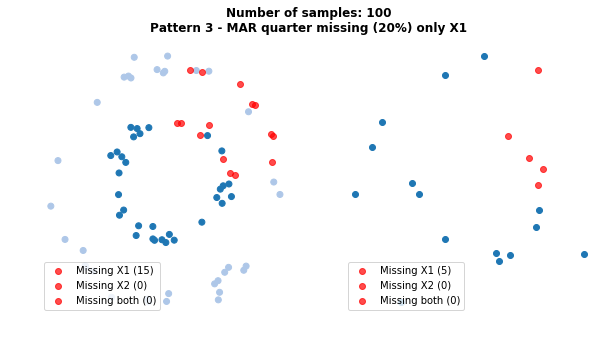

In [15]:
dataset = DatasetGenerator(dataset_name=dataset_name, 
                            num_samples=num_samples, 
                            imbalance_ratio=imbalance_ratio, 
                            missing_data_handling=missing_data_handling,
                            imputation_method=imputation_method,
                            verbosity=verbosity)

# Creation of the missingness
dataset.generate_missing_coordinates(missingness_pattern=missingness_pattern, ratio_of_missing_values=ratio_of_missing_values, ratio_missing_per_class=ratio_missing_per_class)

dataset.split_test_train()

_ = dataset.plot(title=True)

# Experiment 1) the `multi_ditributions` approach

Doing experiment 114!


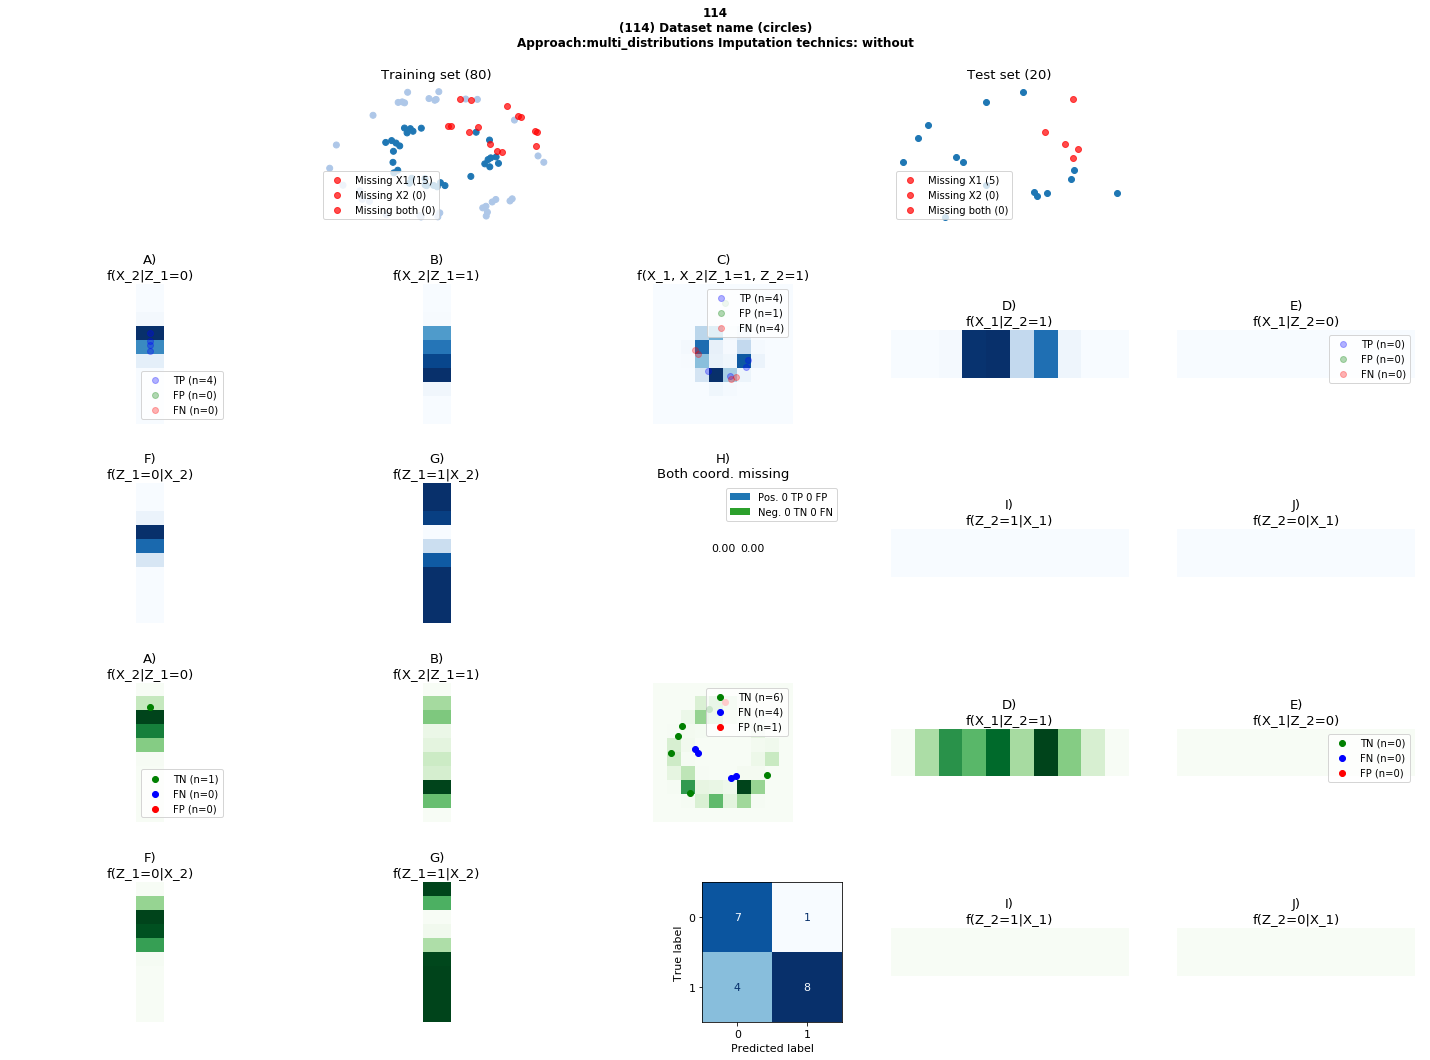

Sample: 12 positive and 8 negative samples (#p/#n=150%)



,0
Accuracy,0.750
F1 score (2 PPVxTPR/(PPV+TPR)),0.762
Matthews correlation coefficient (MCC),0.533
"Sensitivity, recall, hit rate, or true positive rate (TPR)",0.667
"Specificity, selectivity or true negative rate (TNR)",0.875
Precision or positive predictive value (PPV),0.889
Negative predictive value (NPV),0.636
Miss rate or false negative rate (FNR),0.333
False discovery rate (FDR=1-PPV),0.111
False omission rate (FOR=1-NPV),0.364


In [5]:
missing_data_handling='without'
imputation_method='without'
approach = 'multi_distributions'

# Change dataset missing data handling
dataset.change_imputation_approach(missing_data_handling=missing_data_handling, imputation_method=imputation_method)

# Create the experiments
exp = Experiments(dataset_name, 
                  dataset=dataset, 
                  purpose='classification', 
                  approach = approach, 
                  previous_experiment=None, 
                  save_experiment=True, 
                  verbosity=1, 
                  debug=False, 
                  proportion_train=PROPORTION_TRAIN, 
                  resolution=RESOLUTION, 
                  bandwidth=BANDWIDTH,
                  random_state=RANDOM_STATE)


# Estimate the distributions 
exp.fit()

# Estimate the distributions 
exp.predict()

# Plot results
exp.plot()

# Experiment 2) The `single_distribution` approaches


Imputed 80 values (train) and 20 (test) using method multi_dimensional_weighting.
Imputed 80 values (train) and 20 (test) using method multi_dimensional_weighting.


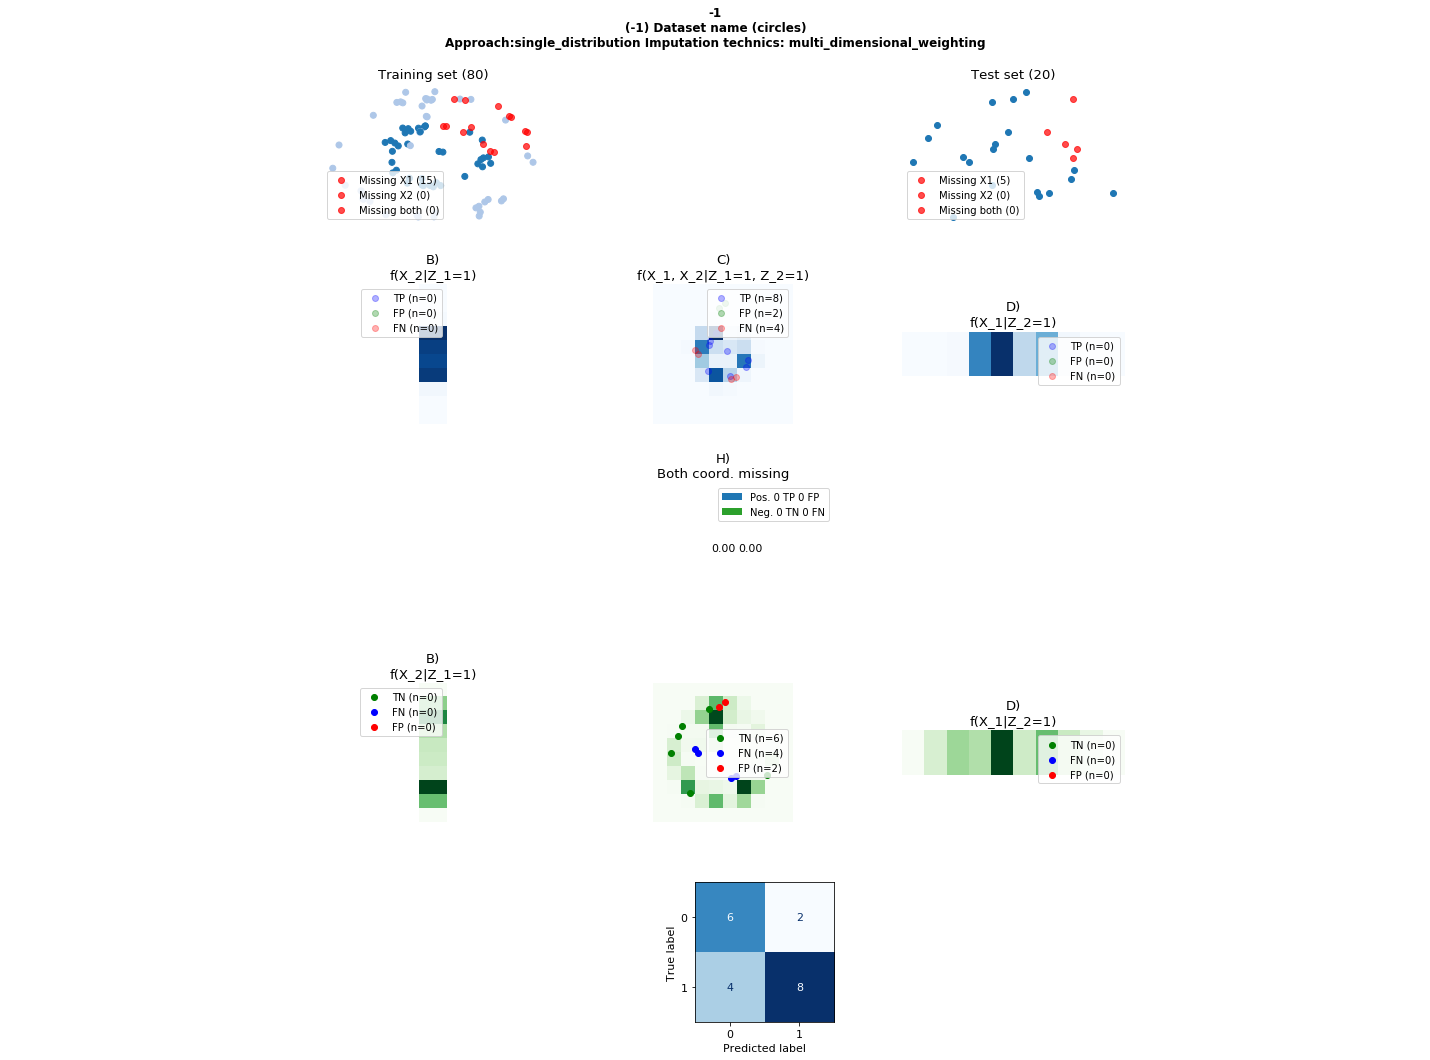

Sample: 12 positive and 8 negative samples (#p/#n=150%)



,0
Accuracy,0.700
F1 score (2 PPVxTPR/(PPV+TPR)),0.727
Matthews correlation coefficient (MCC),0.408
"Sensitivity, recall, hit rate, or true positive rate (TPR)",0.667
"Specificity, selectivity or true negative rate (TNR)",0.750
Precision or positive predictive value (PPV),0.800
Negative predictive value (NPV),0.600
Miss rate or false negative rate (FNR),0.333
False discovery rate (FDR=1-PPV),0.200
False omission rate (FOR=1-NPV),0.400


In [32]:
approach = 'single_distribution'
missing_data_handling='imputation'
imputation_method='multi_dimensional_weighting'

# Change dataset missing data handling
dataset.change_imputation_approach(missing_data_handling=missing_data_handling, imputation_method=imputation_method)

# Create the experiments
exp = Experiments(dataset_name, 
                  dataset=dataset, 
                  purpose='classification', 
                  approach = approach, 
                  previous_experiment=None, 
                  save_experiment=False, 
                  verbosity=1, 
                  debug=False, 
                  proportion_train=PROPORTION_TRAIN, 
                  resolution=RESOLUTION, 
                  bandwidth=BANDWIDTH,
                  random_state=RANDOM_STATE)


# Estimate the distributions 
exp.fit()

# Estimate the distributions 
exp.predict()

# Plot results
exp.plot()

# Experiment X) Neural Additive Networks

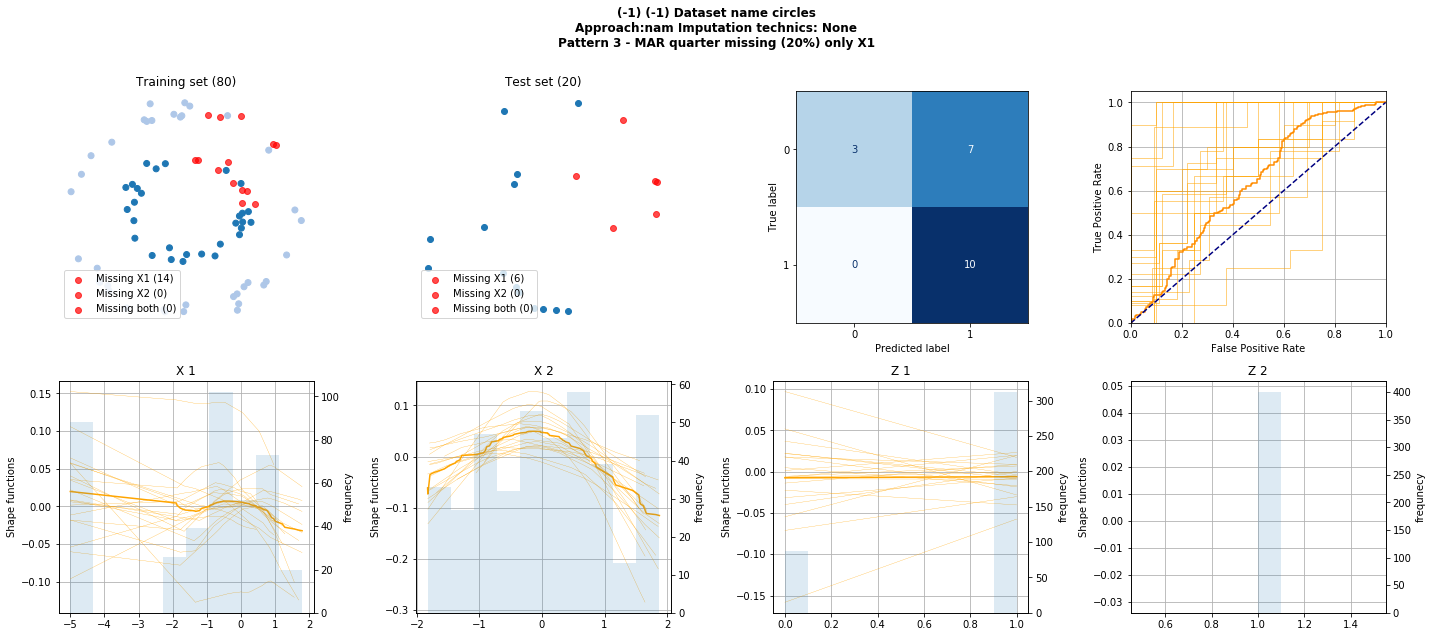

In [19]:
approach = 'nam'
missing_data_handling='encoding'
imputation_method=None
use_missing_indicator_variables = True

# Change dataset missing data handling
dataset.change_imputation_approach(missing_data_handling=missing_data_handling, imputation_method=imputation_method)

# Create the experiments
exp = Experiments(dataset_name, 
                  dataset=dataset, 
                  purpose='classification', 
                  approach = approach, 
                  previous_experiment=None, 
                  save_experiment=False, 
                  verbosity=0, 
                  debug=False, 
                  proportion_train=PROPORTION_TRAIN, 
                  resolution=RESOLUTION, 
                  bandwidth=BANDWIDTH,
                  random_state=RANDOM_STATE)


# Estimate the distributions 
exp.fit(use_missing_indicator_variables=use_missing_indicator_variables)

# Estimate the distributions 
exp.predict()

# Plot results
exp.plot()

In [8]:
exp()

          Attribute Name                	 type                                    	 Value or first element                                                                                                                                
          -----------------------------------------------------------------------------------------------------------------------------------------------------------------

          dataset_name                  	 str                                     	 circles                                                                                                                                               
          debug                         	 int                                     	 False                                                                                                                                                 
          verbosity                     	 int                                     	 0                                     

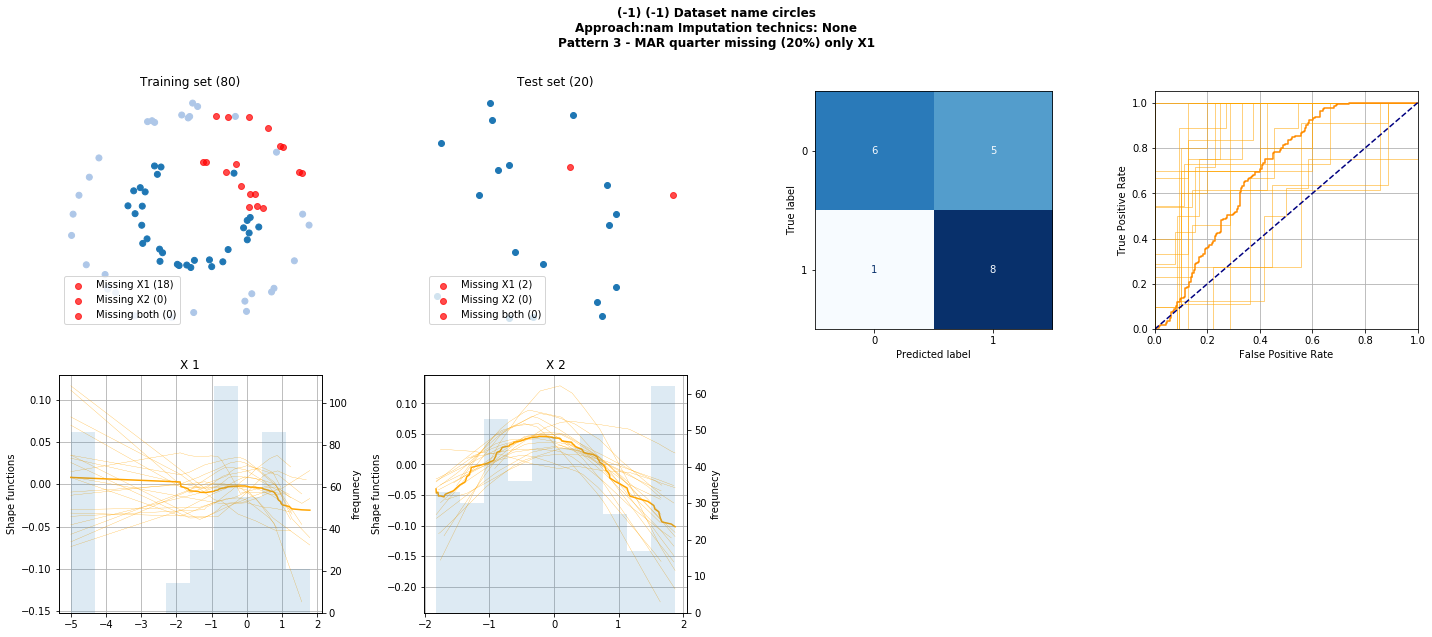

In [9]:
self = exp

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from model.neural_additive_models.visualization import plot_roc_curves, plot_shape_functions


#Select the best replicate as the predictions_df for plotting reasons. Note this is based on AUC.
best_replicate = np.argmax(self.performances_df['Area Under the Curve (AUC)'])
best_predictions_df = self.predictions_df.query(" `replicate` == @best_replicate")



# Create the pannel 
fig, axes = plt.subplots(2, 4, figsize=(20, 8)); axes = axes.flatten()
fig.suptitle("({}) {}\n{}".format(int(self.experiment_number), self.description, self.dataset.missingness_description), y=1.1, weight='bold', fontsize=12)

# Plot the dataset 
axes[0], axes[1] = self.dataset.plot(ax1=axes[0], ax2=axes[1], title=False)
axes[0].set_title("Training set ({})".format(self.dataset.X_train.shape[0])); axes[1].set_title("Test set ({})".format(self.dataset.X_test.shape[0]))

# Plot the performances 
cm = confusion_matrix(best_predictions_df['y_true'].to_numpy(), best_predictions_df['y_pred'].to_numpy()> CLASSIFICATION_THRESHOLD)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', ax=axes[2])
disp.im_.colorbar.remove()    
                                                                                               
# Plot the shapes functions
features = ['X_1', 'X_2', 'Z_1', 'Z_2'] if self.use_missing_indicator_variables else ['X_1', 'X_2']                                                                                              

axes[3] = plot_roc_curves(self.predictions_df, ax=axes[3]) 
axes = plot_shape_functions(self.predictions_df, features, axes=axes, ncols=4, start_axes_plotting=4) 

if not use_missing_indicator_variables:
    [axes[i].axis('off') for i in [6, 7]]

plt.tight_layout();plt.show()


(<matplotlib.axes._subplots.AxesSubplot at 0x7fad69bb7710>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fad79bf2490>)

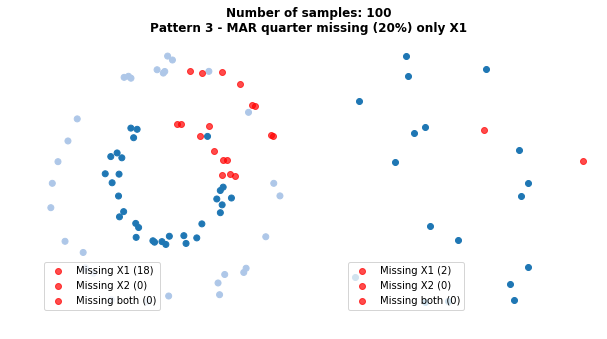

In [33]:
dataset.plot()

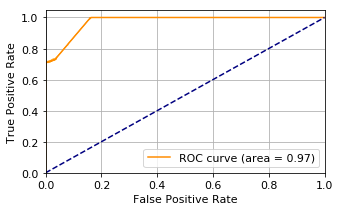

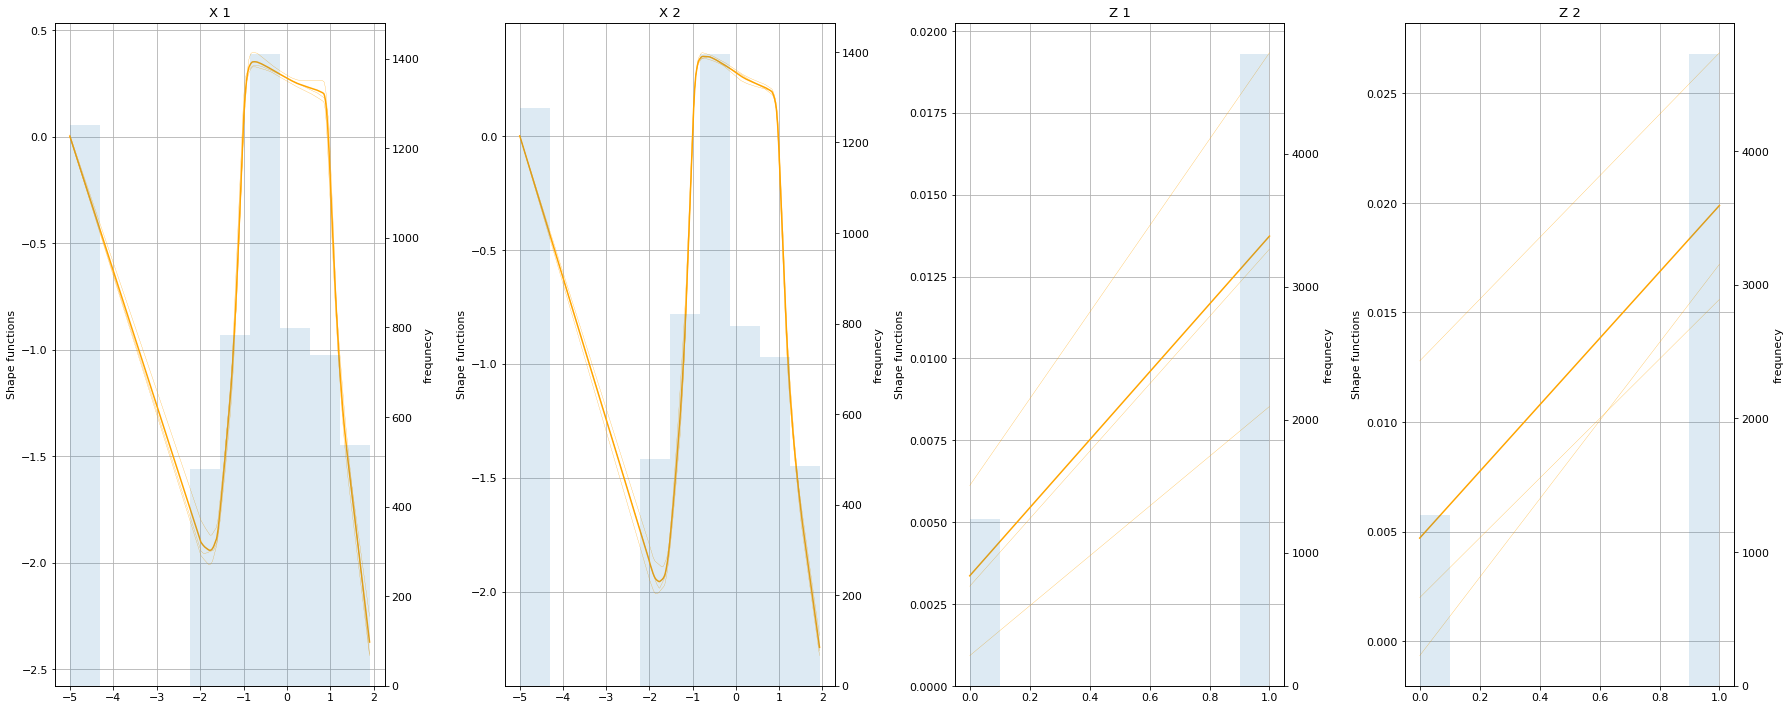

In [21]:

plot_roc_curves(results, 'y_pred','y_true', **args['plotting']['roc'])

plot_shape_functions(results, features, **args['plotting']['shapes']) 

In [22]:
model

NAM(
  (feature_nets): ModuleList(
    (0): FeatureNet(
      (layers): Sequential(
        (0): ReLU(
          (linear): Linear(in_features=1, out_features=64, bias=True)
        )
        (1): ReLU(
          (linear): Linear(in_features=64, out_features=64, bias=True)
        )
        (2): Dropout(p=0.1, inplace=False)
        (3): ReLU(
          (linear): Linear(in_features=64, out_features=32, bias=True)
        )
        (4): Dropout(p=0.1, inplace=False)
        (5): Linear(in_features=32, out_features=1, bias=False)
      )
    )
    (1): FeatureNet(
      (layers): Sequential(
        (0): ReLU(
          (linear): Linear(in_features=1, out_features=64, bias=True)
        )
        (1): ReLU(
          (linear): Linear(in_features=64, out_features=64, bias=True)
        )
        (2): Dropout(p=0.1, inplace=False)
        (3): ReLU(
          (linear): Linear(in_features=64, out_features=32, bias=True)
        )
        (4): Dropout(p=0.1, inplace=False)
        (5): Linear

# Experiment X) Explainable Boosting Machine 

In [ ]:
from interpret.glassbox import ExplainableBoostingClassifier


from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit, cross_validate

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.linear_model import SGDClassifier, LogisticRegression

from interpret.glassbox import ExplainableBoostingClassifier


def format_n(x):
    return "{0:.3f}".format(x)

random_state = 47
n_splits = 5


model = ExplainableBoostingClassifier(n_jobs=-1, random_state=random_state)

model.fit(X,y)
from interpret import show

ebm_global = model.explain_global()
show(ebm_global)

ss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.25, random_state=random_state)
scores = cross_validate(model, X, y, scoring='roc_auc', cv=ss, n_jobs=None, return_estimator=True)

record = dict()
record['model_name'] = 'EBM'
record['fit_time_mean'] = format_n(np.mean(scores['fit_time']))
record['fit_time_std'] = format_n(np.std(scores['fit_time']))
record['test_score_mean'] = format_n(np.mean(scores['test_score']))
record['test_score_std'] = format_n(np.std(scores['test_score']))
record

# Experiment X) XGBoost

In [ ]:
import xgboost as xgb


# Normalize the feature space to it has 0 mean and unitary std. 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

from xgboost import XGBClassifier
from ml import visualize_classifier, my_model, plot_PR_and_ROC_curves, evaluate_model
from sklearn.model_selection import train_test_split
def test_model(X=None,y=None,model=None,df=None, num_cv=None, verbose=False, th=.5, **kwargs):
    """
    Test model and append results to the df. 
    """
    fig, recall, precision, ths_pr, fpr, tpr, ths_roc = evaluate_model(num_cv=num_cv, 
                                                                       model=model,  
                                                                       X=X, 
                                                                       y=y, 
                                                                       threshold=th, 
                                                                       classes_names=['TD', 'ASD'],verbose=verbose, **kwargs)
    
    # Store the resutls
    df = df.append({'ExperimentName':model.name, 
                    'recall':recall, 
                    'precision':precision, 
                    'fpr':fpr, 
                    'tpr':tpr, 
                    'ths_roc': ths_roc,
                    'ths_pr': ths_pr},  ignore_index=True)
    
    return df

def plot_results_PR_and_ROC(df):
    import warnings
    warnings.filterwarnings("ignore", category=DeprecationWarning) 


    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        """
        Plot the pr and roc curves for the results saved in the pandas df. 
        """
        from plotly.subplots import make_subplots
        import plotly.graph_objects as go    

        """
        Define plot asthetics
        """
        ref_color = '#888E90'  # Color of reference lines
        colors = plt.get_cmap(name='Paired').colors  # color of each algorithm

        """
        PR curve
        """
        # (1) Initialize figures 
        fig = make_subplots(rows=1, cols=2)

        # (2) Add iso-fscore traces to PR curve
        # Add the iso-levels of f1
        f_scores = np.linspace(0.2, 0.8, num=4)
        for f_score in f_scores:
            x = np.linspace(0.01, 1)
            yy = f_score * x / (2 * x - f_score)
            fig.add_trace(go.Line(x=x[yy >= 0], y=yy[yy >= 0], name='f1={:2.1f}'.format(f_score), 
                        line=dict(color=ref_color)), row=1, col=1)
        fig.update_yaxes(title_text="Recall", scaleanchor = "x", scaleratio = 1, row=1, col=1)
        fig.update_xaxes(title_text="Precision", range=[0, 1], constrain='domain', row=1, col=1)
        fig.update_yaxes(range=(0, 1), constrain='domain', row=1, col=1)

        # (3) Add PR curve associated to each experiment
        for i,row in df.iterrows():
            precision = row['precision']
            recall = row['recall']
            name = row['ExperimentName']
            ths_pr = row['ths_pr']
            color = 'rgb{}'.format(colors[np.mod(i, len(colors))])
            fig.add_trace(go.Line(x=precision,y=recall, name=name, 
                                  line=dict(color=color), hovertext=ths_pr), row=1, col=1)

        """
        Plot ROC curve
        """
        # Init plot 
        fig.add_trace(go.Line(x=np.linspace(0,1,10), y=np.linspace(0,1,10),
                            line=dict(color=ref_color)), row=1, col=2)

        for i, row in df.iterrows():
            fpr = row['fpr']
            tpr = row['tpr']
            ths = row['ths_roc']
            name = row['ExperimentName']
            color = 'rgb{}'.format(colors[np.mod(i, len(colors))])
            fig.add_trace(go.Line(x=fpr,y=tpr, line=dict(color=color), hovertext=ths), row=1, col=2)
        fig.update_yaxes(title_text='TPR', scaleanchor = "x", scaleratio = 1, row=1, col=2)
        fig.update_xaxes(title_text='FPR', range=[0, 1], constrain='domain', row=1, col=2)
        fig.update_yaxes(range=(0, 1), constrain='domain', row=1, col=2)
        fig.update_layout(title="PR AND ROC curves")
    return fig

def test_set_of_features(data, feats, name, df, th=.5, algos=['knn']):

    
    filter_criteria =  ' `diagnosis` in [0,1] and `age` <= 36'
    
    # Define X and y for this example    
    X  = data.query(filter_criteria)[feats].to_numpy()
    y = data.query(filter_criteria)['diagnosis'].to_numpy()

    # Check the methods and compare fitting all data (cv=0) with CV
    for i,algo in enumerate(algos):
        print('-------------------------')
        print('{} || {} '.format(name, algo))
        print('-------------------------')
        
        for cv in [16]:
            model = my_model(method=algo, name='{}::{}-{}cv'.format(name, algo, cv), **parameters[algo])            
            df = test_model(X=X,y=y,df=df, model=model, num_cv=cv, verbose=True, th=th)   
    return df


train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, stratify=y)


parameters={'knn': {}, 
            'xgboost' : {}, 
            'nb': {}}

parameters['xgboost'] = {'n_estimators' : 100,
                         'max_depth' : 2,
                         'min_child_weight' : 3,
                         'colsample_bytree' : .8, 
                         'colsample_bynode' : .8
                        }

parameters_fit={'knn': {}, 
                'xgboost' : {}}
parameters_fit['xgboost'] = {'early_stopping_rounds' : 5,
                             #'eval_set' : [(test_X, test_y)],
                             'verbose' : 0}



#model = my_model(method='xgboost', name='xgboost', **parameters['xgboost'])
#model.fit(X, y, balanced=True, **parameters_fit['xgboost'])

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

algos = ['knn', 'nb', 'xgboost']
# Create a df to store all the results of each experiement
results_summary = pd.DataFrame({'ExperimentName':[], 'recall':[], 'precision':[], 'fpr':[], 'tpr':[]})

    
plt.figure(figsize=[20,10])
# Check the methods and compare fitting all data (cv=0) with CV
for i,algo in enumerate(algos):
    for cv in [0]:
        model = my_model(method=algo, name='{}-{}cv'.format(algo, cv), **parameters[algo])
        results_summary = test_model(X=X,y=y,df=results_summary, model=model, num_cv=cv)    
        
fig = plot_results_PR_and_ROC(results_summary)
fig.show()


from sklearn.metrics import plot_roc_curve
features_dict = {'all':['proportion_of_name_call_responses', 'average_response_to_name_delay',
                         'gaze_silhouette_score', 'mean_gaze_percent_right', 'FP_gaze_speech_correlation',
                         'S_postural_sway', 'NS_postural_sway',
                         'pop_rate', 'average_force_applied', 'average_length', 'number_of_touches', 'average_touch_duration','average_error'],
                 'all+age':['age','proportion_of_name_call_responses', 'average_response_to_name_delay',
                             'gaze_silhouette_score', 'mean_gaze_percent_right', 'FP_gaze_speech_correlation',
                             'S_postural_sway', 'NS_postural_sway',
                             'pop_rate', 'average_force_applied', 'average_length', 'number_of_touches', 'average_touch_duration','average_error'],
                 
                 'gaze' : ['BB_gaze_percent_right', 'BB_gaze_silhouette_score', 'S_gaze_percent_right', 
                           'S_gaze_silhouette_score', 'FP_gaze_speech_correlation','FP_gaze_silhouette_score'],
                 
                 'RTN' : ['proportion_of_name_call_responses', 'average_response_to_name_delay'],
                 
                 'postural' : ['S_postural_sway', 'NS_postural_sway'],
                 
                 'touch' : ['pop_rate', 'average_force_applied', 'average_length', 'number_of_touches', 'average_touch_duration','average_error']
                }
results_summary = pd.DataFrame({'ExperimentName':[], 'recall':[], 'precision':[], 'fpr':[], 'tpr':[]})

for name, feats in features_dict.items():
    print('\n')
    print('-------------------------')
    print('{} '.format(name))
    print('-------------------------')

    filter_criteria =  ' `diagnosis` in [0,1] and `age` <= 36'
    
    # Define X and y for this example    
    X  = data.query(filter_criteria)[feats].to_numpy()
    y = data.query(filter_criteria)['diagnosis'].to_numpy()
    
    model = my_model(method='xgboost', name='xgboost', **parameters['xgboost'])
    model.fit(X, y, balanced=True)
    model.model.get_booster().feature_names = feats
    
    #df = test_model(X=X,y=y,df=df, model=model, num_cv=cv, verbose=True, th=.5)
    plot_roc_curve(model, X, y, name=name) 
    xgb.plot_importance(model.model.get_booster(),  height=0.7)
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    xgb.plot_tree(model.model.get_booster(), num_trees=model.model.best_iteration, ax=ax)
    plt.show()

    
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

xgb.plot_tree(model.model.get_booster(), num_trees=model.model.best_iteration, ax=ax)

#model.model.get_booster().feature_names = feats
xgb.plot_importance(model.model.get_booster(),  height=0.7)


from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_california_housing
import xgboost as xgb
import multiprocessing


xgb_model = xgb.XGBRegressor(n_jobs=multiprocessing.cpu_count() // 2)
clf = GridSearchCV(xgb_model, {'max_depth': [2, 4, 6],
                               'n_estimators': [50, 100, 200]}, verbose=1,
                   n_jobs=2)
clf.fit(X, y)
print(clf.best_score_)
print(clf.best_params_)


# Experiment on the data imputation confidence! 

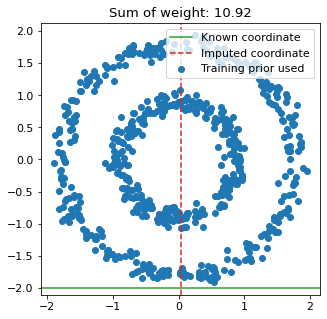

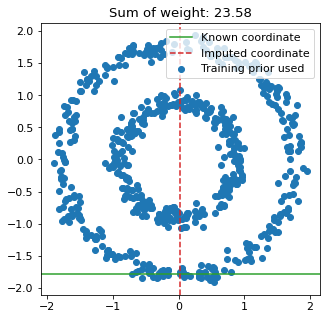

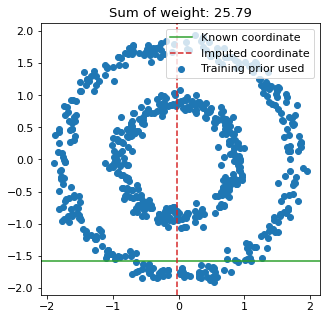

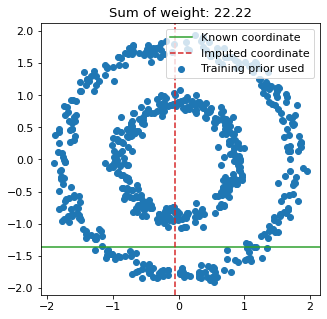

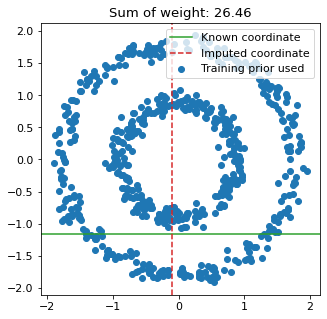

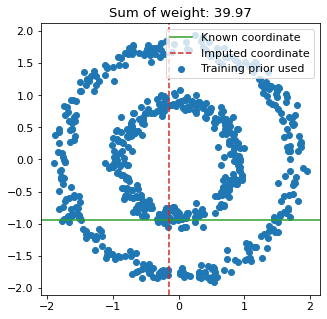

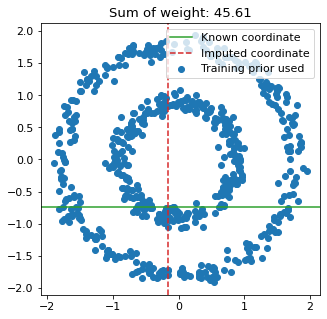

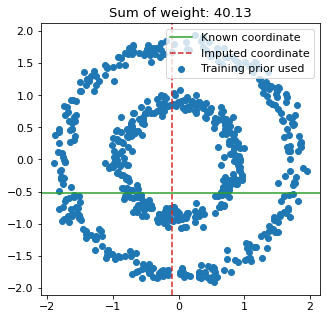

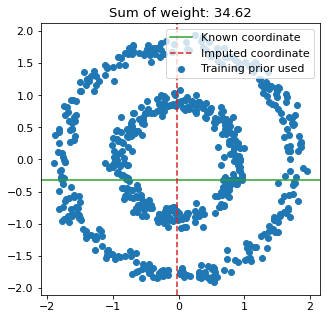

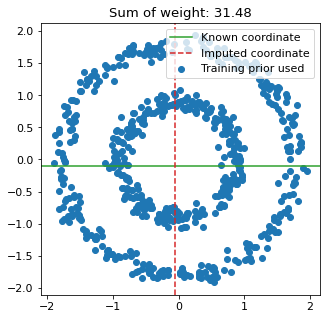

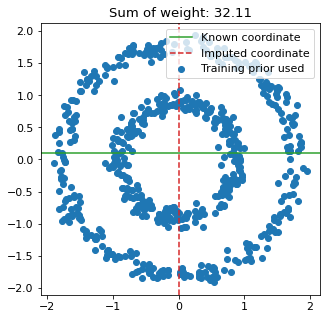

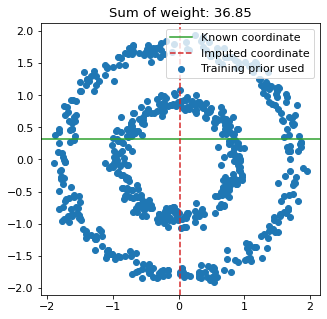

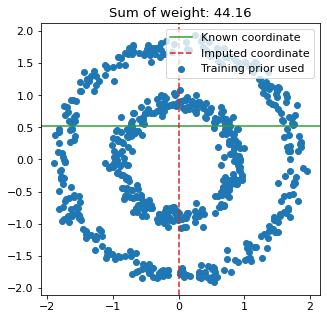

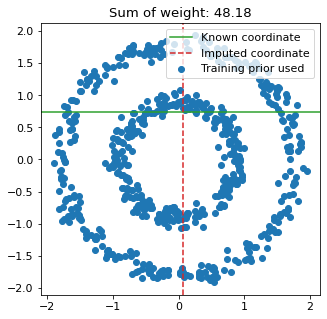

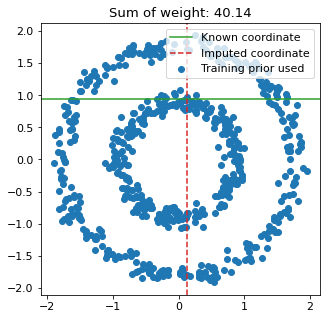

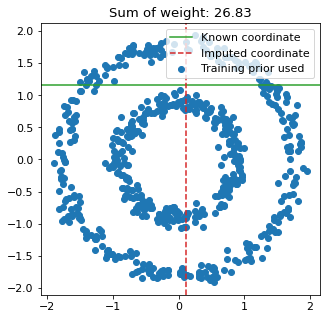

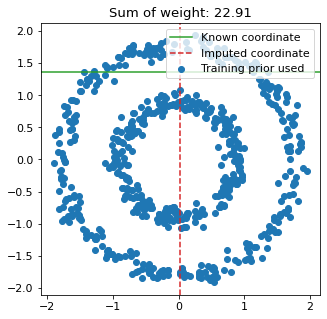

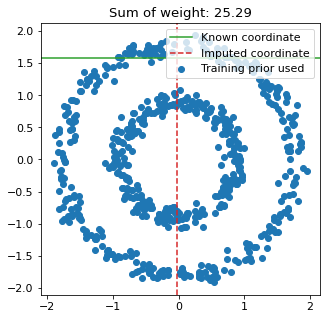

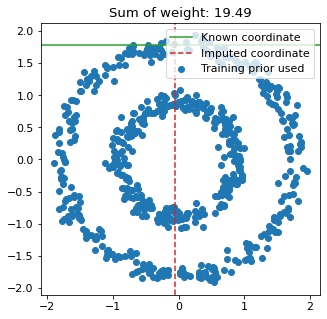

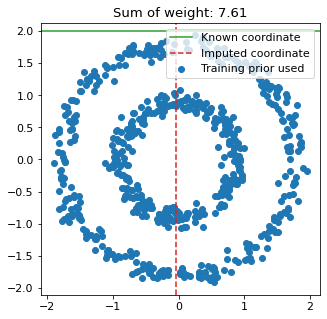

In [73]:



X_i = self.dataset_test.X[5]
w_list = []
a_list = np.linspace(-2, 2, 20)
for a in np.linspace(-2, 2, 20):
    X_i = np.array([np.nan, a])
    from copy import deepcopy
    h=bandwidth
    """
    Contribution of the X_i sample to the estimation of the pdf of X at x. 
    X_prior contains the samples for which there is no missing values, which are used as prior when the contribution of sample with partially missing data is calculated.
    """
    k = X_i.shape[0]  # dimension of the space of samples. 


    # Copy the feature value 
    hat_X_i = deepcopy(X_i)


    # Perform imputation if needed
    coords_missing = np.isnan(X_i)  # unknown coordinates of X_i
    for j in range(k):        
        if coords_missing[j]:  # we don't know the j-th coordinate, we need to impute it

            # We use the term associate to the j-th coordinate for the 
            # rest of the samples in the training set (for which the j-th component is know).
            # The contribution of each term is weighted with the distance to the sample hyperplane.
            hat_X_ij = 0
            Ws = 1e-10  # eps
            for X_p in X_prior:
                w_p = W(X_i, X_p)
                hat_X_ij += w_p * X_p[j]
                Ws += w_p
            hat_X_ij /= Ws

            hat_X_i[j] = hat_X_ij



    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.scatter(X_prior[:,0], X_prior[:,1], label='Training prior used')
    if coords_missing[0]:
        ax.axhline(y=X_i[1], color='tab:green', label='Known coordinate')
        ax.axvline(x=hat_X_i[0], color='tab:red', linestyle='--',  label='Imputed coordinate')
    elif coords_missing[1]:
        ax.axvline(x=X_i[0], color='tab:green', label='Known coordinate')
        ax.axhline(y=hat_X_i[1], color='tab:red', linestyle='-.', label='Imputed coordinate')
    ax.set_title("Sum of weight: {:.2f}".format(Ws))
    plt.legend()
    w_list.append(Ws)

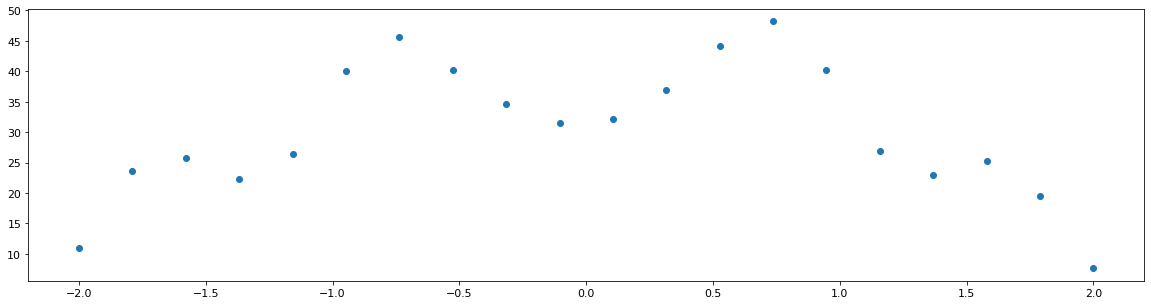

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.scatter(a_list, w_list, label='Training prior used')

(array([ 2.,  1.,  9.,  7.,  7.,  5.,  7.,  7.,  8.,  3.,  8.,  1.,  4.,
         3.,  3.,  1.,  8.,  1.,  2.,  2.,  6.,  5.,  3.,  8.,  7., 11.,
        10.,  7., 10., 12., 12., 12., 10.,  9.,  8., 11.,  8.,  9.,  7.,
         5.,  5.,  8., 13., 12.,  5., 11.,  6.,  6.,  5.,  6.,  7.,  6.,
        10.,  4.,  3.,  5.,  6., 10.,  9.,  8.,  5.,  6.,  6.,  9.,  7.,
         4., 14., 14., 11., 13., 10., 10.,  9.,  9.,  3.,  3.,  5.,  5.,
         3.,  3.,  2.,  4.,  4.,  2.,  9.,  2.,  4.,  4.,  8.,  5.,  4.,
         5.,  8.,  7.,  6.,  3.,  4.,  4.,  1.,  1.]),
 array([-1.90212367, -1.86353119, -1.82493871, -1.78634622, -1.74775374,
        -1.70916126, -1.67056877, -1.63197629, -1.5933838 , -1.55479132,
        -1.51619884, -1.47760635, -1.43901387, -1.40042139, -1.3618289 ,
        -1.32323642, -1.28464393, -1.24605145, -1.20745897, -1.16886648,
        -1.130274  , -1.09168152, -1.05308903, -1.01449655, -0.97590406,
        -0.93731158, -0.8987191 , -0.86012661, -0.82153413, -0.782941

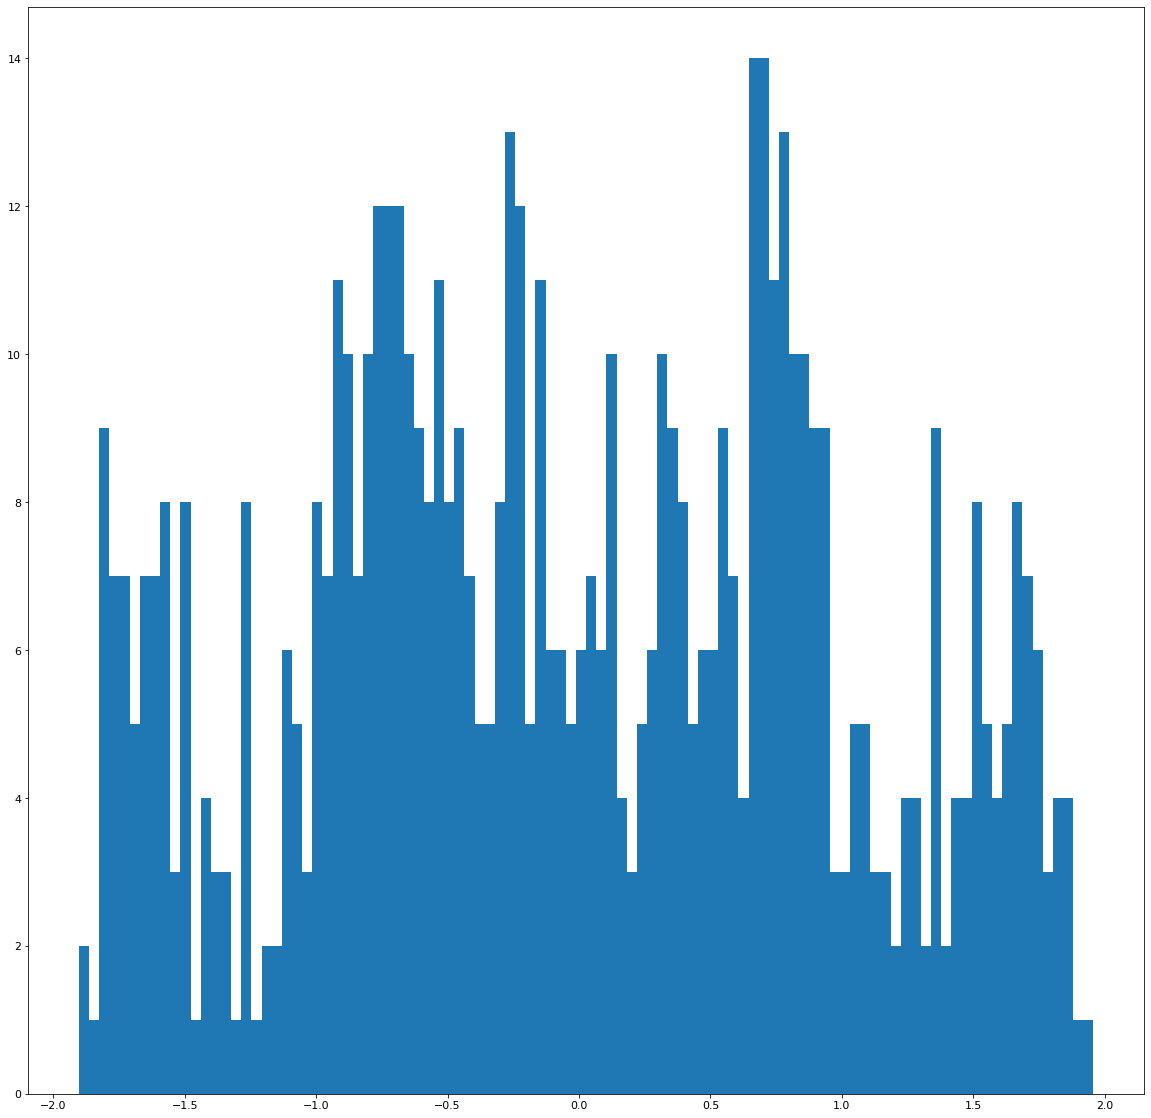

In [80]:
fi(20,20)
plt.hist(X_prior[:,0], bins=100)

In [77]:
X_prior

array([[-1.77376447,  0.10066745],
       [-0.51293983,  0.72030419],
       [ 0.93408859, -0.02222138],
       ...,
       [ 0.88751608, -0.38326858],
       [ 0.4311868 ,  0.73814206],
       [ 0.15760208,  0.78081698]])